In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import joblib
from astropy.table import Table
from pyrafspec.fitslist import load_multispec, specwcs, MultiSpecItem
from pyrafspec.readirafmultispec import readmultispec

In [3]:
def read_p200_spec(fname):
    ''' read spectrum observed by P200
    returns:
    ---------------
    wave
    flux
    fluxerr
    flux_norm
    flux_cont
    '''
    hdulist = fits.open(fname)
    flux0=hdulist[0].data
    try:
        flux = flux0[0][0]
        fluxerr = flux0[3][0]
    except: 
        flux = flux0
        fluxerr = np.zeros_like(flux)
    temp=hdulist[0].header['CRVAL1']
    step=hdulist[0].header['CD1_1']
    wave = temp + np.arange(hdulist[0].header['NAXIS1'])*step
    
    #flux_norm, flux_cont = normalization.normalize_spectrum_spline(wave, flux, niter=3)
    return wave, flux,fluxerr

# make lamp template

- fname_templatelate calibrated by iraf

In [4]:
fname_template = '../data/P200DBSP/blue0062tbfarce.0001_1d.fits'
lampirafdic = readmultispec(fname_template, reform=False)

Dispersion is order-5 cubic spline
Correcting for redshift: z=0.000000


In [5]:
fname_obj = '../data/P200DBSP/P200_blue0059tbfe13_w.fits'
hdu_obj = fits.open(fname_obj)

In [6]:
dump_obj = joblib.load('../data/P200DBSP/star-blue0059.fits.dump')
#dump_obj = joblib.load('/home/sdb216/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/P200feige64DATA-tolijiao/dump/star-blue0059.fits.dump')
dump_lamp = joblib.load('../data/P200DBSP/lamp-blue0062.fits.dump')
#dump_lamb = joblib.load('/home/sdb216/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/P200feige64DATA-tolijiao/dump/lamp-blue0062.fits.dump')
dump_obj['blaze_norm'] = np.array([ _/np.median(_) for _ in dump_obj['blaze'] ])

In [7]:
wave, flux,fluxerr = read_p200_spec(fname_obj)

Text(0, 0.5, 'Flux/median')

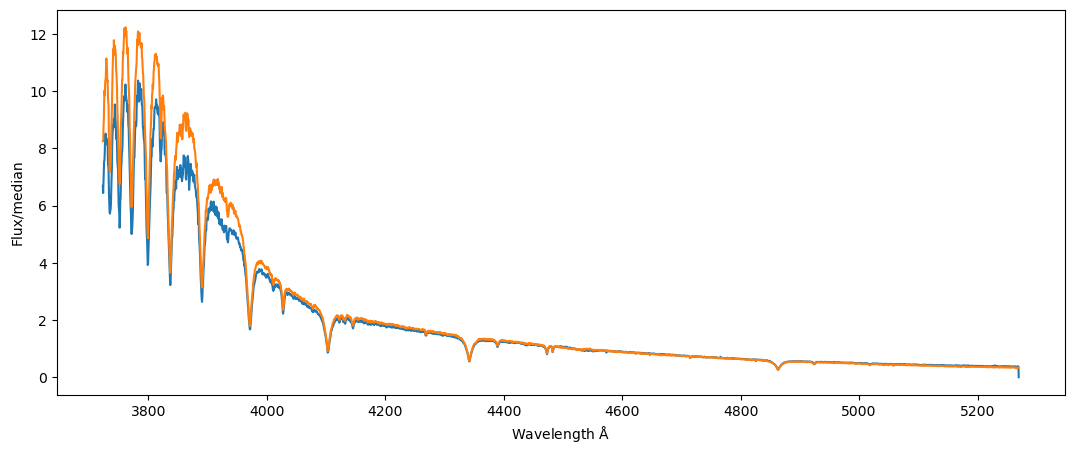

In [8]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.plot(wave, flux/np.median(flux), label='iraf')

_flux =( dump_obj['spec_extr']/dump_obj['blaze_norm'])[0]
plt.plot(lampirafdic['wavelen'][0],_flux/np.median(_flux), label='pyexspec')

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

In [9]:
linelist = joblib.load('../data/P200DBSP/fear_linelist.z')

# save the lamp (FEAR arc for DBSP) template

In [11]:
fear_template = {}
fear_template['wave'] = lampirafdic['wavelen']
fear_template['flux'] = dump_lamp['lamp1d']
fear_template['linelist'] = linelist
#joblib.dump(fear_template, '../P200DBSP/template/fear_template_blue.z')

Text(0, 0.5, 'Flux/median')

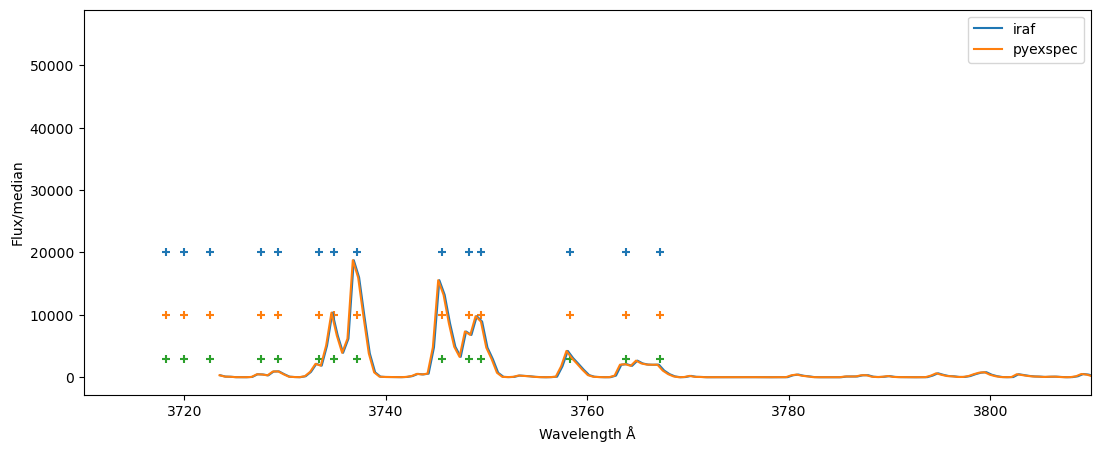

In [13]:

flux_fear = dump_lamp['lamp1d'][0]
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.plot(fear_template['wave'][0], fear_template['flux'][0], label='iraf')

plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
plt.scatter(linelist, np.ones(len(linelist))*20000, marker='+')
plt.scatter(linelist, np.ones(len(linelist))*10000, marker='+')
plt.scatter(linelist, np.ones(len(linelist))*3000, marker='+')

dw = 100
xlim = 3710+dw*0
plt.xlim(xlim, xlim+dw)

plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

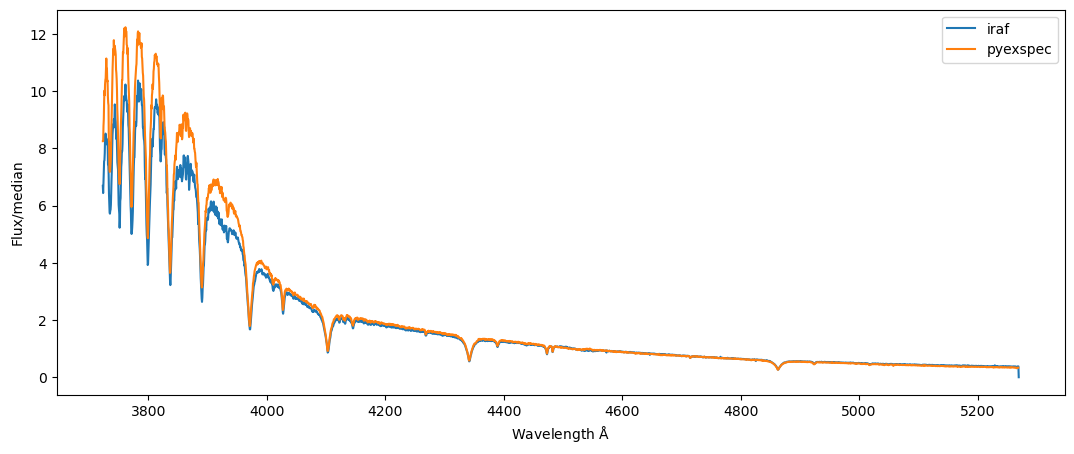

In [11]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.plot(wave, flux/np.median(flux), label='iraf')

_flux =( dump_obj['spec_extr']/dump_obj['blaze_norm'])[0]
plt.plot(dump_lamp['wave_solu'][0],_flux/np.median(_flux), label='pyexspec')

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


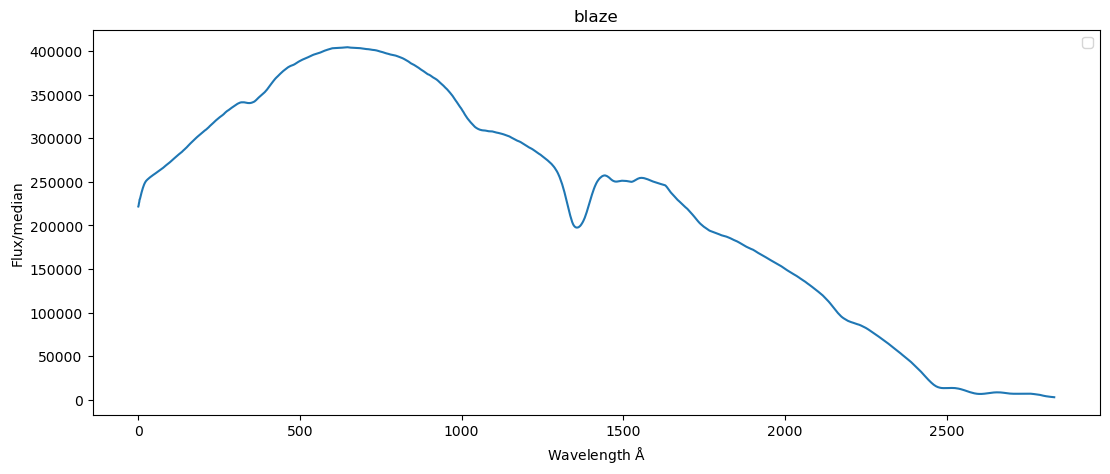

In [12]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
blaze = dump_obj['blaze'][0]/np.median(dump_obj['blaze'][0])
plt.plot(dump_obj['blaze'][0])

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')
plt.title('blaze')
plt.legend()

/tmp/ipykernel_1220254/2732070853.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(flux/fluxerr, label='iraf')


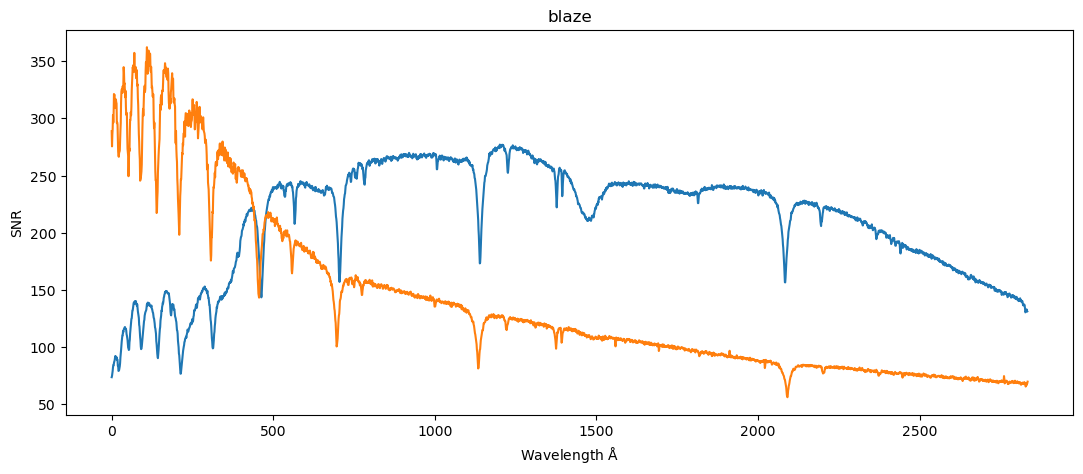

In [27]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.plot((dump_obj['spec_extr'][0]/dump_obj['err_extr'][0])[::-1], label='pyexspec')
plt.plot(flux/fluxerr, label='iraf')

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'SNR')
plt.title('blaze')
plt.show()

In [28]:
_ind = (linelist> 3700) & (linelist < 5300)
linelist[_ind]

array([3705.5657, 3709.2459, 3718.2065, 3719.9346, 3722.5625, 3727.6187,
       3729.3087, 3733.3169, 3734.8636, 3737.1313, 3745.5608, 3748.2617,
       3749.4847, 3758.2324, 3763.7885, 3767.1914, 3812.9641, 3815.8397,
       3820.4251, 3824.4436, 3825.8805, 3827.8226, 3834.2222, 3856.3717,
       3859.9114, 3868.5284, 3878.573 , 3886.282 , 3895.6558, 3899.7073,
       3902.9452, 3906.4794, 3920.2577, 3922.9115, 3925.7188, 3930.2962,
       3946.0971, 3948.9789, 3969.257 , 3979.3559, 3994.7918, 4005.2414,
       4033.8093, 4042.8937, 4044.4179, 4045.813 , 4052.9208, 4063.5939,
       4103.9121, 4118.5442, 4131.7235, 4143.8688, 4158.5905, 4164.1795,
       4198.3036, 4200.6745, 4216.1828, 4222.6373, 4237.2198, 4259.3619,
       4271.7593, 4277.5282, 4294.1243, 4300.1008, 4307.9015, 4315.0837,
       4325.7615, 4331.1995, 4333.5612, 4335.3379, 4337.0708, 4345.168 ,
       4348.064 , 4352.2049, 4362.0662, 4367.8316, 4375.9294, 4379.6668,
       4383.5445, 4385.0566, 4400.9863, 4404.7499, 

# calibrate wavelength by IRAF
- write the follow code into calibrate_wave.py file & python python calibrate_wave.py

# use iraf
- $cl --> noao --> imred --> echel --> echelle --> ecidentify or dispcor
- edit parameter: epa eci

# keywords of iraf 
- k --> down to next order 
- j --> up to previous order or (check rms) 
- h --> leave rms 
- d --> delete points 
- m --> mark points 
- f --> fit curve 
- w&e -> 
- - e --> select zone (xaixs invert: right_bottom --> left_top; yaxis_invert: left_top-->right_bottom)
- w&a --> restore image
- q --> quit

In [197]:
fname_lamp = '../data/P200DBSP/lamp-blue0062.fits.dump'

dump_lamp = joblib.load(fname_lamp)
_header = dump_lamp['header']
_data = np.array(dump_lamp['lamp1d'][0], dtype=np.float32)
hdulamp = fits.HDUList([fits.PrimaryHDU(header=_header, data=_data)])

hdulamp.writeto('../data/P200DBSP/lamp-blue0062.fits', overwrite=True)

In [3]:
!cp /share/data/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/P200feige64DATA-tolijiao/dump/lamp-blue0062.fits.dump ../data/P200DBSP/

/bin/bash: /share/data/lijiao/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [195]:
dump_lamp['lamp1d']

array([[3484.49103678,  478.19267972,  104.40395885, ...,   97.5       ,
         313.        , 1325.5       ]])

In [1]:
pwd

'/share/data/lijiao/Documents/pyexspec/ipynb'